<a href="https://colab.research.google.com/github/jitu522/HackHeritage2025/blob/main/face__mask_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 55% 90.0M/163M [00:00<00:00, 943MB/s]
100% 163M/163M [00:00<00:00, 962MB/s] 


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2480.jpg', 'with_mask_1036.jpg', 'with_mask_490.jpg', 'with_mask_2043.jpg', 'with_mask_1725.jpg']
['with_mask_1334.jpg', 'with_mask_2978.jpg', 'with_mask_1574.jpg', 'with_mask_953.jpg', 'with_mask_2430.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3191.jpg', 'without_mask_1522.jpg', 'without_mask_169.jpg', 'without_mask_2925.jpg', 'without_mask_1675.jpg']
['without_mask_3141.jpg', 'without_mask_1135.jpg', 'without_mask_1033.jpg', 'without_mask_2430.jpg', 'without_mask_147.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

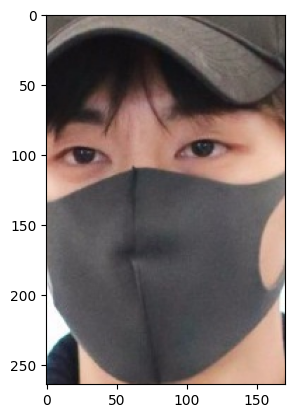

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1550.jpg')
imgplot = plt.imshow(img)
plt.show()

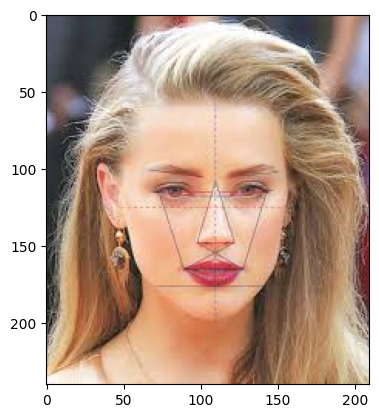

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2926.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[236, 237, 239],
        [236, 237, 241],
        [236, 236, 243],
        ...,
        [ 77,  93,  53],
        [ 94, 111,  69],
        [ 87, 104,  61]],

       [[237, 238, 240],
        [237, 238, 242],
        [237, 237, 244],
        ...,
        [ 86, 103,  58],
        [ 89, 107,  60],
        [105, 123,  75]],

       [[238, 239, 242],
        [238, 239, 243],
        [238, 238, 245],
        ...,
        [ 86, 105,  52],
        [ 97, 116,  61],
        [ 98, 116,  61]],

       ...,

       [[236, 178, 151],
        [239, 180, 153],
        [242, 182, 156],
        ...,
        [199, 190, 175],
        [213, 204, 189],
        [222, 212, 200]],

       [[240, 177, 145],
        [242, 179, 147],
        [245, 182, 150],
        ...,
        [199, 190, 175],
        [193, 184, 169],
        [199, 190, 177]],

       [[238, 176, 144],
        [241, 179, 147],
        [245, 183, 150],
        ...,
        [215, 206, 190],
        [216, 207, 191],
        [215, 206, 189]]], dtype=uint8)
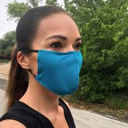

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
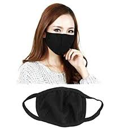

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - acc: 0.6979 - loss: 0.6885 - val_acc: 0.8760 - val_loss: 0.2926
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8758 - loss: 0.3132 - val_acc: 0.8893 - val_loss: 0.2820
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8955 - loss: 0.2630 - val_acc: 0.8860 - val_loss: 0.2657
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9220 - loss: 0.2010 - val_acc: 0.9157 - val_loss: 0.2267
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9253 - loss: 0.1881 - val_acc: 0.9190 - val_loss: 0.2227


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9289 - loss: 0.2659
Test Accuracy = 0.9278623461723328


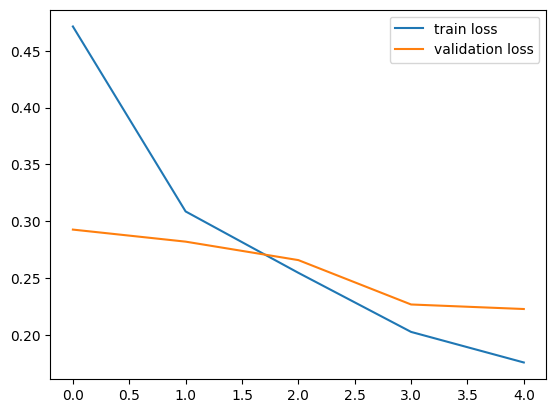

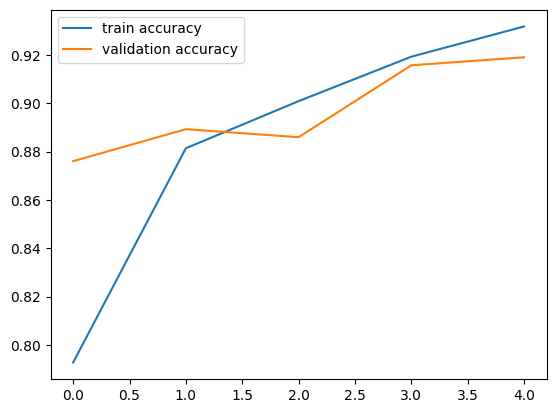

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Enter image path: /content/face mask 1.jpg


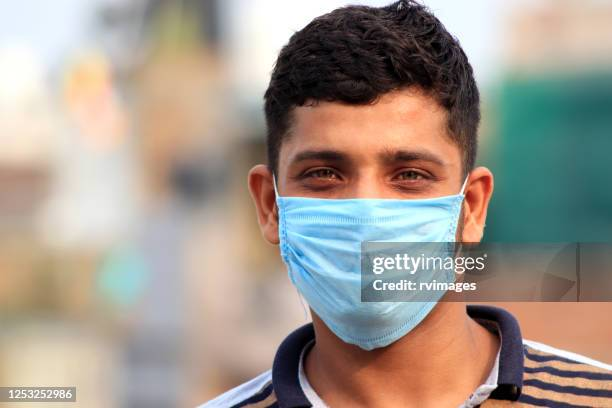

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Raw prediction: 0.65121806
😷 WITH MASK


In [ ]:
image_path = input("Enter image path: ")
img = cv2.imread(image_path)

if img is None:
    print("Invalid image path")
else:
    cv2_imshow(img)

    h, w, _ = img.shape

    # Face-focused crop (important!)
    face = img[int(0.25*h):int(0.85*h), int(0.2*w):int(0.8*w)]

    face = cv2.resize(face, (128,128))
    face = face / 255.0
    face = face.reshape(1,128,128,3)

    prediction = model.predict(face)[0][0]

    print("Raw prediction:", prediction)

    if prediction >= 0.6:
        print("😷 WITH MASK")
    else:
        print("❌ WITHOUT MASK")


Enter image path: /content/how-to-wear-face-mask-right-way.jpg


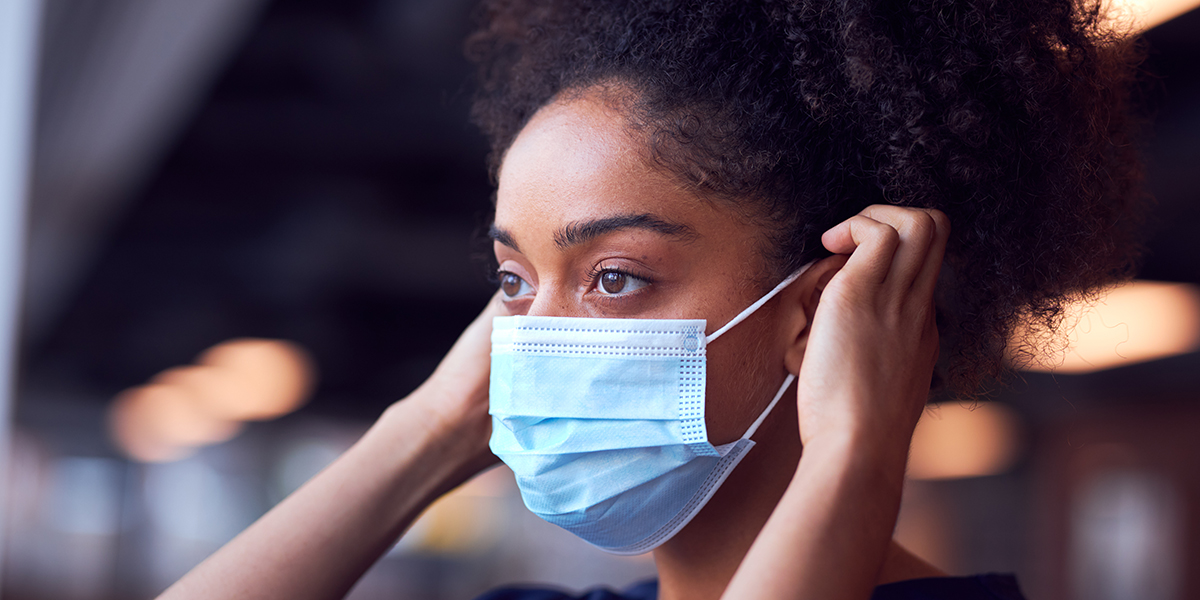

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw prediction: 0.6371601
😷 WITH MASK


In [ ]:
image_path = input("Enter image path: ")
img = cv2.imread(image_path)

if img is None:
    print("Invalid image path")
else:
    cv2_imshow(img)

    h, w, _ = img.shape

    # Face-focused crop (important!)
    face = img[int(0.25*h):int(0.85*h), int(0.2*w):int(0.8*w)]

    face = cv2.resize(face, (128,128))
    face = face / 255.0
    face = face.reshape(1,128,128,3)

    prediction = model.predict(face)[0][0]

    print("Raw prediction:", prediction)

    if prediction >= 0.6:
        print("😷 WITH MASK")
    else:
        print("❌ WITHOUT MASK")


Enter image path: /content/without mask 2.avif


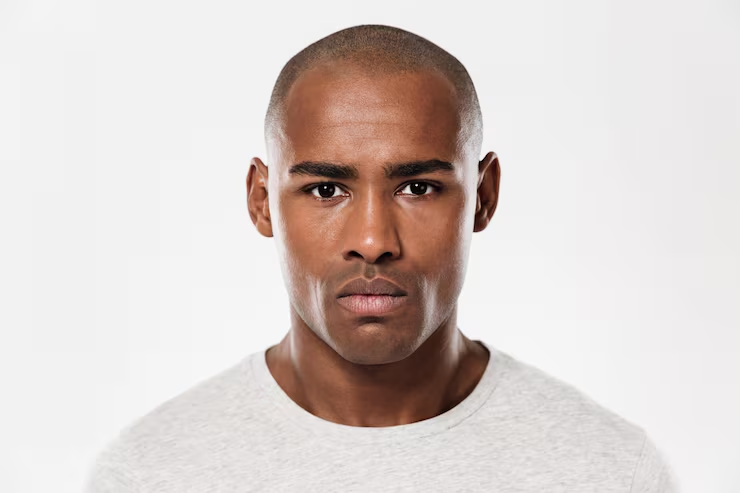

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Raw prediction: 0.4267192
❌ WITHOUT MASK


In [ ]:
image_path = input("Enter image path: ")
img = cv2.imread(image_path)

if img is None:
    print("Invalid image path")
else:
    cv2_imshow(img)

    h, w, _ = img.shape

    # Face-focused crop (important!)
    face = img[int(0.25*h):int(0.85*h), int(0.2*w):int(0.8*w)]

    face = cv2.resize(face, (128,128))
    face = face / 255.0
    face = face.reshape(1,128,128,3)

    prediction = model.predict(face)[0][0]

    print("Raw prediction:", prediction)

    if prediction >= 0.6:
        print("😷 WITH MASK")
    else:
        print("❌ WITHOUT MASK")


Enter image path: /content/without mask 3.avif


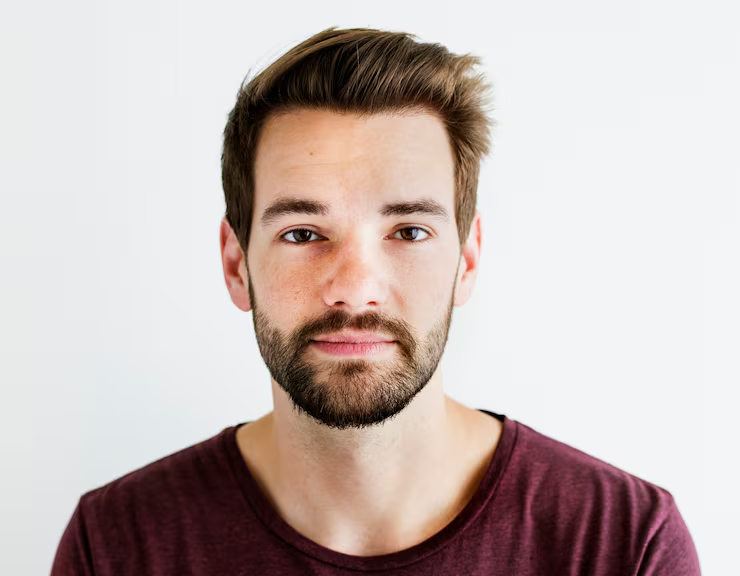

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Raw prediction: 0.5011751
❌ WITHOUT MASK


In [ ]:
image_path = input("Enter image path: ")
img = cv2.imread(image_path)

if img is None:
    print("Invalid image path")
else:
    cv2_imshow(img)

    h, w, _ = img.shape

    # Face-focused crop (important!)
    face = img[int(0.25*h):int(0.85*h), int(0.2*w):int(0.8*w)]

    face = cv2.resize(face, (128,128))
    face = face / 255.0
    face = face.reshape(1,128,128,3)

    prediction = model.predict(face)[0][0]

    print("Raw prediction:", prediction)

    if prediction >= 0.6:
        print("😷 WITH MASK")
    else:
        print("❌ WITHOUT MASK")
